<a href="https://colab.research.google.com/github/ibrahim10sy/learn-python/blob/main/arbre_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arbre de régression**

Dans cet exercice, nous utiliserons un jeu de données réel pour entraîner un modèle d'arbre de régression. Ce jeu de données, qui comprend des informations sur les pourboires des taxis, a été collecté et fourni à la Commission des taxis et limousines de New York (TLC) par des fournisseurs de technologies agréés par les programmes d'amélioration des services de transport de passagers par taxi et de livraison (TPEP/LPEP). Vous utiliserez le modèle entraîné pour prédire le montant des pourboires versés.

# **Obectif**

* Effectuer un prétraitement de données de base avec Scikit-Learn
* Modéliser une tâche de régression avec Scikit-Learn
* Entraîner un modèle de régression d'arbre de décision
* Exécuter des inférences et évaluer la qualité des modèles entraînés

# **Introduction**

L'ensemble de données utilisé dans cet exercice est un sous-ensemble de l'ensemble de données TLC accessible au public (tous droits réservés par la Commission des taxis et limousines (TLC) de la ville de New York). La prédiction du montant du pourboire peut être modélisée comme un problème de régression. Pour entraîner le modèle, Nous pouvons utiliser une partie de l'ensemble de données d'entrée, et les données restantes pour évaluer la qualité du modèle entraîné.

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

In [10]:
from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [11]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
df = pd.read_csv(url)
df

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


In [3]:
df.to_csv("taxis.csv", index=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               41202 non-null  int64  
 1   passenger_count        41202 non-null  int64  
 2   trip_distance          41202 non-null  float64
 3   RatecodeID             41202 non-null  int64  
 4   store_and_fwd_flag     41202 non-null  int64  
 5   PULocationID           41202 non-null  int64  
 6   DOLocationID           41202 non-null  int64  
 7   payment_type           41202 non-null  int64  
 8   fare_amount            41202 non-null  float64
 9   mta_tax                41202 non-null  float64
 10  tolls_amount           41202 non-null  float64
 11  improvement_surcharge  41202 non-null  int64  
 12  tip_amount             41202 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


Chaque ligne de l'ensemble de données représente une course en taxi. Comme illustré ci-dessus, chaque ligne comporte 13 variables. L'une d'elles est « pourboire_montant », qui sera la variable cible. Votre objectif sera d'entraîner un modèle utilisant les autres variables pour prédire la valeur de la variable « pourboire_montant ».

Pour mieux comprendre l'ensemble de données, traçons la corrélation entre la variable cible et les variables d'entrée.

In [12]:
df.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
VendorID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,NaN,1.000000,-0.004092,0.065441,-0.007627,-0.001270,0.000266,NaN,0.039041,-0.061276,0.045621,-0.012612,0.015081
trip_distance,NaN,-0.004092,1.000000,0.043416,0.001202,-0.076809,0.037901,NaN,0.430373,0.070344,0.116085,0.031708,0.101819
RatecodeID,NaN,0.065441,0.043416,1.000000,0.001357,-0.023547,0.034514,NaN,0.491720,-0.871507,0.020164,-0.031749,0.094075
store_and_fwd_flag,NaN,-0.007627,0.001202,0.001357,1.000000,0.000703,-0.003097,NaN,-0.000055,-0.003332,0.002761,-0.000121,0.000320
PULocationID,NaN,-0.001270,-0.076809,-0.023547,0.000703,1.000000,0.017738,NaN,-0.112935,0.002109,-0.015988,0.039675,-0.023086
DOLocationID,NaN,0.000266,0.037901,0.034514,-0.003097,0.017738,1.000000,NaN,0.036020,0.003866,0.055673,-0.004676,0.024348
payment_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,NaN,0.039041,0.430373,0.491720,-0.000055,-0.112935,0.036020,NaN,1.000000,-0.364302,0.104411,-0.000011,0.200638
mta_tax,NaN,-0.061276,0.070344,-0.871507,-0.003332,0.002109,0.003866,NaN,-0.364302,1.000000,0.064604,0.036430,-0.054488


In [13]:
correlation_values = df.corr()['tip_amount'].drop('tip_amount')

In [14]:
correlation_values

,tip_amount
VendorID,NaN
passenger_count,0.015081
trip_distance,0.101819
RatecodeID,0.094075
store_and_fwd_flag,0.000320
PULocationID,-0.023086
DOLocationID,0.024348
payment_type,NaN
fare_amount,0.200638
mta_tax,-0.054488


<Axes: >

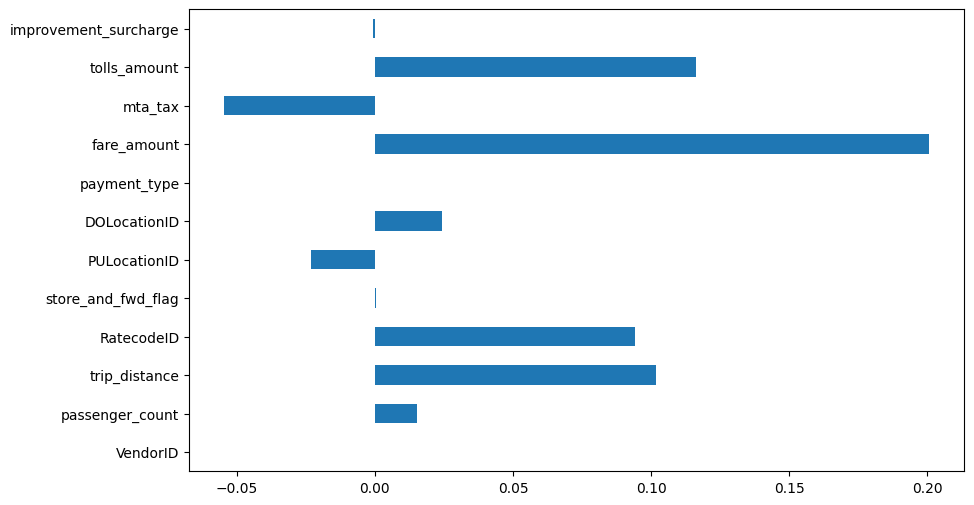

In [15]:
correlation_values.plot(kind='barh', figsize=(10, 6))


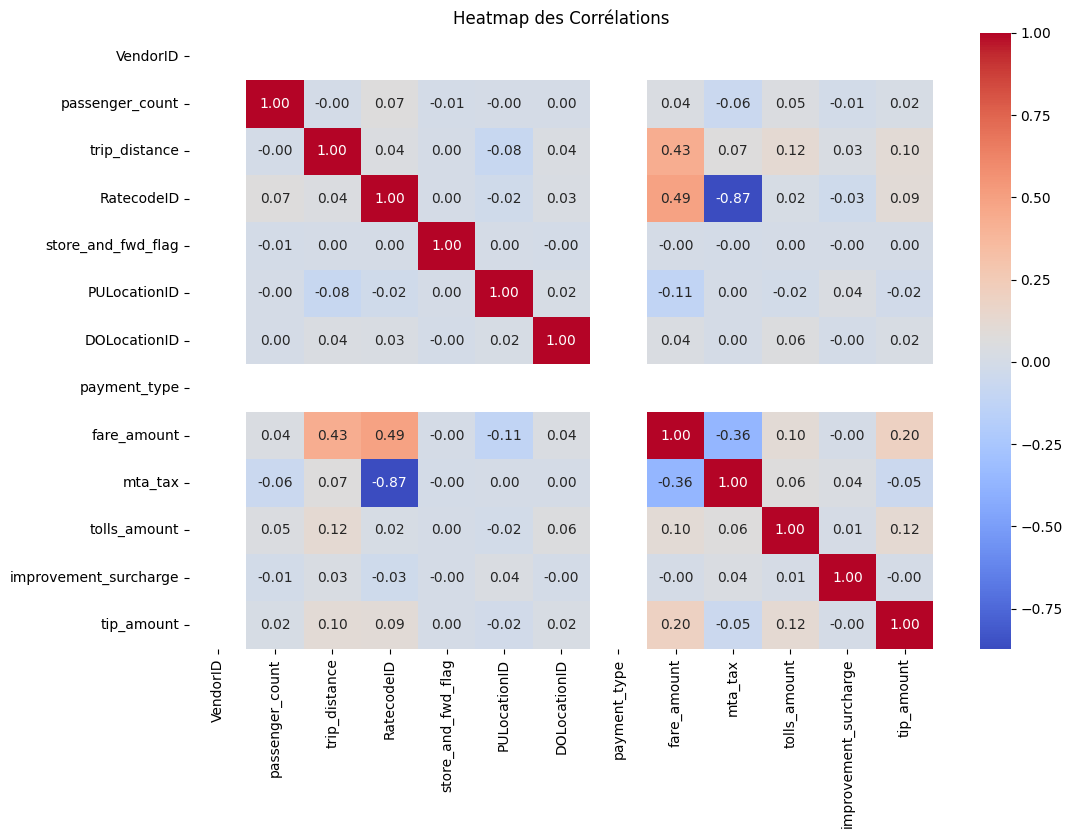

In [21]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Créer une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap des Corrélations')
plt.show()

# **Prétraitement du jeux de données**

In [30]:
df['tip_amount']

,tip_amount
0,16.54
1,16.19
2,12.00
3,5.00
4,10.00
...,...
41197,5.00
41198,8.00
41199,8.00
41200,16.19


In [27]:
y = df[['tip_amount']].values.astype('float32')

In [29]:
y[:,0]

array([16.54, 16.19, 12.  , ...,  8.  , 16.19,  4.13], dtype=float32)

In [43]:
X

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1


In [81]:
X = df.drop(columns=['tip_amount','VendorID','store_and_fwd_flag','payment_type','improvement_surcharge'])

In [55]:
# X.values

array([[ 2.  ,  1.  , 17.63, ...,  0.5 ,  6.94,  1.  ],
       [ 2.  ,  1.  , 19.52, ...,  0.5 ,  6.94,  1.  ],
       [ 2.  ,  1.  , 17.81, ...,  0.5 ,  6.94,  1.  ],
       ...,
       [ 2.  ,  1.  , 17.31, ...,  0.5 ,  6.94,  1.  ],
       [ 2.  ,  1.  , 17.28, ...,  0.5 ,  6.94,  1.  ],
       [ 2.  ,  1.  , 16.82, ...,  0.5 ,  6.94,  1.  ]])

In [82]:
X.to_numpy()

array([[ 1.  , 17.63,  2.  , ..., 70.  ,  0.5 ,  6.94],
       [ 1.  , 19.52,  2.  , ..., 70.  ,  0.5 ,  6.94],
       [ 1.  , 17.81,  2.  , ..., 70.  ,  0.5 ,  6.94],
       ...,
       [ 1.  , 17.31,  2.  , ..., 70.  ,  0.5 ,  6.94],
       [ 1.  , 17.28,  2.  , ..., 70.  ,  0.5 ,  6.94],
       [ 1.  , 16.82,  2.  , ..., 70.  ,  0.5 ,  6.94]])

In [49]:
# from sklearn.preprocessing import StandardScaler
# X_norm = StandardScaler().fit(X).transform(X)

In [50]:
# X_norm

array([[ 0.        , -0.68588899, -0.26427765, ...,  0.13523596,
         0.44701655,  0.00492659],
       [ 0.        , -0.68588899,  0.39735495, ...,  0.13523596,
         0.44701655,  0.00492659],
       [ 0.        , -0.68588899, -0.20126502, ...,  0.13523596,
         0.44701655,  0.00492659],
       ...,
       [ 0.        , -0.68588899, -0.37630011, ...,  0.13523596,
         0.44701655,  0.00492659],
       [ 0.        , -0.68588899, -0.38680221, ...,  0.13523596,
         0.44701655,  0.00492659],
       [ 0.        , -0.68588899, -0.54783448, ...,  0.13523596,
         0.44701655,  0.00492659]])

In [83]:
# normalisation
X_norm = normalize(X, axis=1, norm='l1', copy=False)

In [84]:
X_norm

array([[0.00253762, 0.04473824, 0.00507524, ..., 0.17763342, 0.00126881,
        0.01761108],
       [0.00213693, 0.04171297, 0.00427387, ..., 0.14958543, 0.00106847,
        0.01483033],
       [0.00359389, 0.06400719, 0.00718778, ..., 0.25157233, 0.00179695,
        0.0249416 ],
       ...,
       [0.00272665, 0.04719836, 0.00545331, ..., 0.19086571, 0.00136333,
        0.01892297],
       [0.00216113, 0.0373444 , 0.00432227, ..., 0.15127939, 0.00108057,
        0.01499827],
       [0.00250463, 0.04212794, 0.00500927, ..., 0.17532435, 0.00125232,
        0.01738216]])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Construire un modèle de régresseur d'arbre de décision avec Scikit-Learn

In [85]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=8,
                               random_state=35)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=35)

Evaluation du modèle

In [86]:
y_pred = dt_reg.predict(X_test)

# evaluate mean squared error on the test dataset
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 25.218
R^2 score : 0.002


In [87]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

def test_perform(depth) :
  dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=depth,
                               random_state=35)
  dt_reg.fit(X_train, y_train)
  y_pred = dt_reg.predict(X_test)

  # evaluation mean squared error sur test dataset
  mse_score = mean_squared_error(y_test, y_pred)
  print('MSE score : {0:.3f}'.format(mse_score))

  r2_score = dt_reg.score(X_test,y_test)
  print('R^2 score : {0:.3f}'.format(r2_score))

In [88]:
test_perform(3)

MSE score : 24.219
R^2 score : 0.041


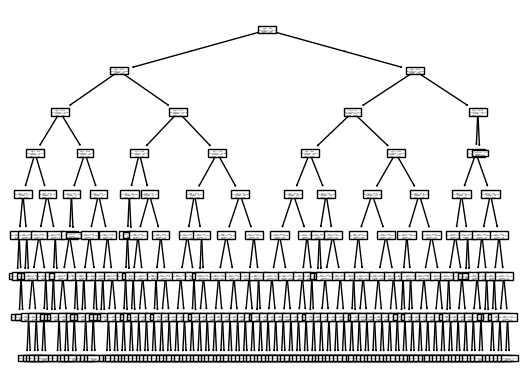

In [75]:
plot_tree(dt_reg)
plt.show()

les trois principales caractéristiques ayant le plus d'impact sur le montant du pourboire.

In [76]:
correlation_values = df.corr()['tip_amount'].drop('tip_amount')

In [77]:
correlation_values

,tip_amount
VendorID,NaN
passenger_count,0.015081
trip_distance,0.101819
RatecodeID,0.094075
store_and_fwd_flag,0.000320
PULocationID,-0.023086
DOLocationID,0.024348
payment_type,NaN
fare_amount,0.200638
mta_tax,-0.054488


In [80]:
abs(correlation_values).sort_values(ascending=False)[:3]

,tip_amount
fare_amount,0.200638
tolls_amount,0.116172
trip_distance,0.101819
